<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Wheat_and_chess_board_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Number of wheat on a 2 x 2 square chess board

In [ ]:
# Sample code.
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [ ]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


In [ ]:
# Represent a 2 x 2 square chessboard by ndarray and calculate the number of wheat in each square.
small_board_ndarray.shape = (2, 2)

---

[Problem 2] Expansion to n × m mass

In [ ]:
# Function that returns a ndarray containing the number of wheat on an nxm chess board.

def chess_board(n, m):
  """A function that returns a ndarray containing the number of wheat on an n*m chess board.

  Parameters
  -----------
  n: int
      Number of rows of the chess board.
  m: int
      Number of columns of the chessboard.

  Returns
  -------
  numpy.ndarray
      The ndarray containing the number of wheat on an nxm chess board.
  """
  import numpy as np
  return 2 ** (np.arange(0, n*m, dtype=np.uint64).reshape(n, m))

In [ ]:
# Find the number of wheat on the 8x8 square chess board.
eight_by_eight_chess_board = chess_board(8,8)
print(eight_by_eight_chess_board)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

---

[Problem 3] Total number of wheat

In [ ]:
print("The total number of wheat on a chess board of 8 x 8 squares is {}.".format(eight_by_eight_chess_board.sum()))

The total number of wheat on a chess board of 8 x 8 squares is 18446744073709551615.


In [ ]:
columns_average = eight_by_eight_chess_board.mean(axis=0)
columns_average

array([9.04252160e+15, 1.80850432e+16, 3.61700864e+16, 7.23401728e+16,
       1.44680346e+17, 2.89360691e+17, 5.78721383e+17, 1.15744277e+18])

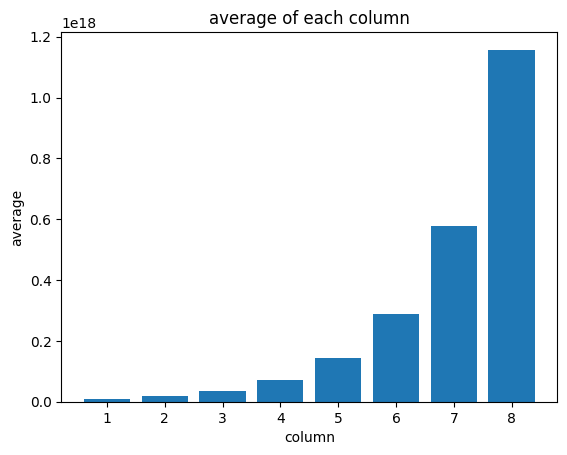

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("average")
plt.title("average of each column")
plt.bar(np.arange(1,9), columns_average)
plt.show()

---

[Problem 4] Heat map of the number of wheat

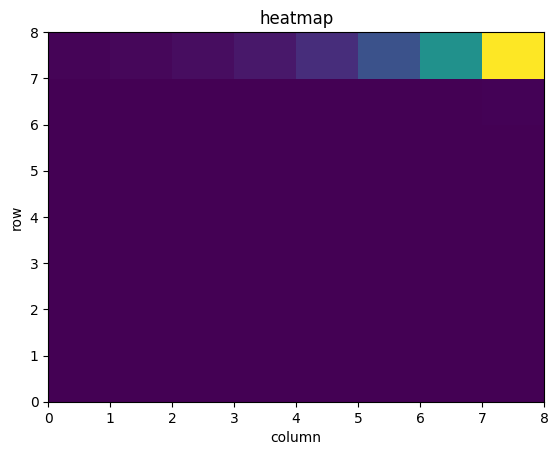

In [ ]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(eight_by_eight_chess_board)
plt.show()

---

[Problem 5] How many times is the second half as long as the first half?

In [ ]:
first_half = eight_by_eight_chess_board[0:4,:].sum()
second_half = eight_by_eight_chess_board[4:8,:].sum()
print(f"The second half of the chessboard has {second_half/first_half} times more wheat than the first half.")

The second half of the chessboard has 4294967296.0 times more wheat than the first half.


---

[Problem 6] Expansion to n × m mass by another calculation method

In [ ]:
# np.append
def np_append_chess_board(n, m):
  """A function that returns a ndarray containing the number of wheat on an n*m chess board using np.append().

  Parameters
  -----------
  n: int
      Number of rows of the chess board.
  m: int
      Number of columns of the chessboard.

  Returns
  -------
  numpy.ndarray
      The ndarray containing the number of wheat on an nxm chess board.
  """
  import numpy as np
  board_ndarray = np.array([1], dtype=np.uint64)
  for _ in range(1, n * m):
    board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])
  return board_ndarray.reshape((n, m)).astype(np.uint64)

In [ ]:
# broadcasting
def broadcast_chess_board(n, m):
  """A function that returns a ndarray containing the number of wheat on an n*m chess board using broadcast.

  Parameters
  -----------
  n: int
      Number of rows of the chess board.
  m: int
      Number of columns of the chessboard.

  Returns
  -------
  numpy.ndarray
      The ndarray containing the number of wheat on an nxm chess board.
  """
  import numpy as np
  return 2 ** np.arange(n * m).astype(np.uint64).reshape((n, m))

---

[Problem 7] Comparing calculation times

In [ ]:
# first method
%timeit -n 1000 chess_board(8,8)

4.56 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# second method
%timeit -n 1000 np_append_chess_board(8,8)

256 µs ± 7.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# third method
%timeit -n 1000 broadcast_chess_board(8,8)

5.1 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


*In summary, the first function is the most efficient, followed by the function made with the broadcasting. The one's made with np.append() appears to be the least efficient.*